<a href="https://colab.research.google.com/github/Simpleshell3/CMR-Land-Sector-Analysis/blob/main/Centre_Cameroon_Land_Sector_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Centre Cameroon Land Sector Analysis
The aim of this exercise is to provide an extensive report on Land use in Centre Cameroon as well as outline the various strategies that can be adopted to mitigate and climate change, provide food security and promote biodiversity.

The Centre Region (French: Région du Centre) occupies 69,000 km² of the central plains of the Republic of Cameroon. It is bordered to the north by the Adamawa Region, to the south by the South Region, to the east by the East Region, and to the West by the Littoral and West Regions. It is the second largest (after East Region) of Cameroon's regions in land area. Major ethnic groups include the Bassa, Ewondo, and Vute.

In [ ]:
# Installing packages
!pip install geopandas 
!pip install matplotlib
!apt install proj-bin libproj-dev libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install mapclassify
!pip install geoplot
!pip install seaborn
!pip install rasterio
!pip install folium
!pip install ipyleaflet

In [2]:
#Importing packages
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
import mapclassify
from mpl_toolkits.basemap import Basemap
import numpy as np
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt
import seaborn as sns
import io
import requests
import rasterio
from rasterio.plot import show
import folium

%matplotlib inline

## Administrative boundary of Centre Cameroon

The province is divided into ten departments (departements):

1. Lekié, with its capital at Monatélé, is northwest of Yaoundé
2. Haute-Sanaga (Upper Sanaga), with its capital Nanga Eboko, in the west and centre of the province
3. Mbam-et-Inoubou (Mbam and Inoubou), with its capital at Bafia,
4. Mbam-et-Kim (Mbam and Kim), with its capital at Ntui, is the largest, occupying almost the entire northern half of the province
5. Méfou-et-Afamba (Méfou and Afamba), with its capital at Mfou, is the area east and south of Yaoundé.
6. Méfou-et-Akono (Méfou and Akono), with its capital at Ngoumou.
7. Mfoundi consists entirely of the Yaoundé capital and greater area.
8. Nyong-et-Kéllé (Nyong and Kéllé), with its capital at Eséka, occupies the southwest corner of the province.
9. Nyong-et-Mfoumou (Nyong and Mfoumou) is opposite this at the southeast, governed from Akonolinga.
10.Nyong-et-So'o (Nyong and So'o), with Mbalmayo as its capital, is on the central border with the South Province.

Each of these departments is headed by a presidentially appointed prefect (prefet), also called a senior divisional officer. The governor, also a presidential appointee, has his offices in Yaoundé.

In [3]:
# Downloading and displaying East Cameroon's Adminitrative Boundaries
url1 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_Centre.json"

a=requests.get(url1).content

df_ccbo = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_ccbo

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,CMR,CM-CE,Centre,Centre,Centre,,administrative,4,Q739951,fr:Région du Centre (Cameroun),2019-02-26T08:00:07,"POLYGON ((10.23080 3.51064, 10.23102 3.50732, ..."


In [5]:
m = folium.Map(
    location=[4, 14],
    tiles="cartodbpositron",
    zoom_start=7,
)

folium.GeoJson(url1, name="adminlevel").add_to(m)

folium.LayerControl().add_to(m)


m

In [6]:
# Downloading and displaying Centre Cameroon's Ecological Zones
url2 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_Centre_GEZ.json"

a=requests.get(url2).content

df_ccgez = gpd.read_file(io.StringIO(a.decode('utf-8')))

df_ccgez

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CMR,CM-CE,Centre,Tropical moist forest,12,TAwa,4,"POLYGON ((12.88212 6.00006, 12.51103 6.00048, ..."
1,CMR,CM-CE,Centre,Tropical rainforest,11,TAr,4,"POLYGON ((12.83352 5.29997, 12.73687 5.29224, ..."


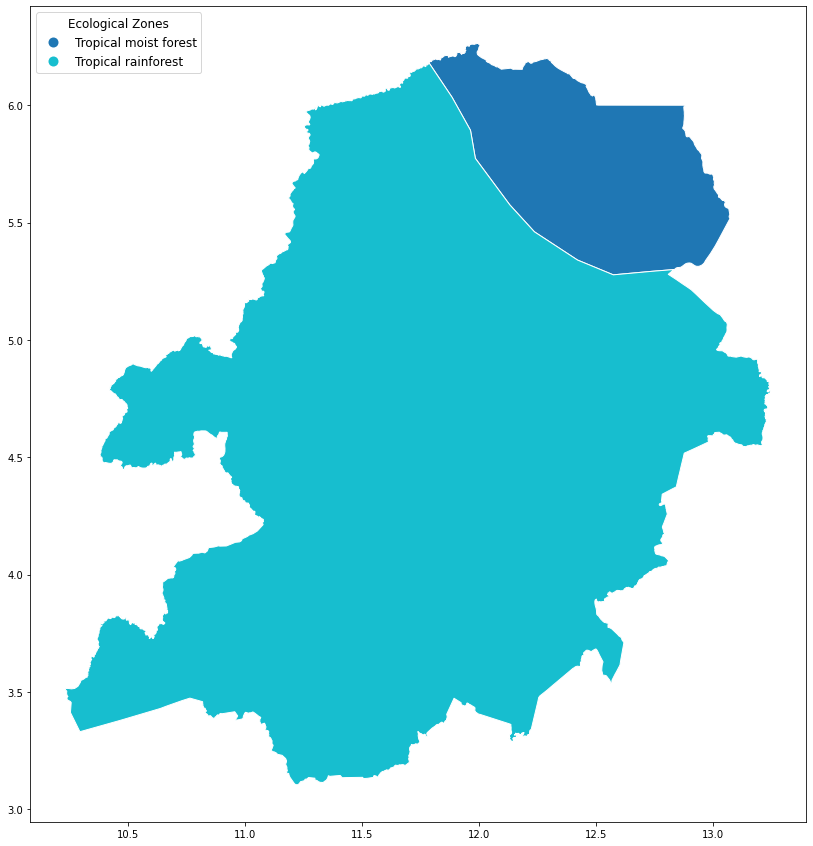

In [8]:
df_ccgez.plot(figsize= (15,15), column='gez_name', edgecolor='white', 
             legend=True, legend_kwds={"loc":"upper left","fontsize": "large", "title":"Ecological Zones", "title_fontsize":"large"})
plt.show()

Centre Cameroon is made up of two Ecological Zones.

# 1. Tropical Mosit Forest


Tropical moist generally found in large, discontinuous patches centered on the equatorial belt and between the Tropics of Cancer and Capricorn, TSMF are characterized by low variability in annual temperature and high levels of rainfall (>200 centimetres (79 in) annually). Forest composition is dominated by evergreen and semi-evergreen deciduous tree species. These trees number in the thousands and contribute to the highest levels of species diversity in any terrestrial major habitat type. In general, biodiversity is highest in the forest canopy. The canopy can be divided into five layers: overstory canopy with emergent crowns, a medium layer of canopy, lower canopy, shrub level, and finally understory.

These forests are home to more species than any other terrestrial ecosystem: Half of the world's species may live in these forests, where a square kilometer may be home to more than 1,000 tree species. 

A perpetually warm, wet climate makes these environments more productive than any other terrestrial environment on Earth and promotes explosive plant growth.A tree here may grow over 23 metres (75 ft) in height in just 5 years. From above, the forest appears as an unending sea of green, broken only by occasional, taller "emergent" trees. These towering emergents are the realm of hornbills, toucans, and the harpy eagle.

The canopy is home to many of the forest's animals, including apes and monkeys. Below the canopy, a lower understory hosts to snakes and big cats. The forest floor, relatively clear of undergrowth due to the thick canopy above, is prowled by other animals such as gorillas and deer.

All levels of these forests contain an unparalleled diversity of invertebrate species, including New Guinea’s stick insects and butterflies that can grow over 30 centimetres (1 ft) in length.

Many forests are being cleared for farmland, while others are subject to large-scale commercial logging. An area the size of Ireland is destroyed every few years.

# 2. Tropical RainForest


Tropical rainforests can be characterized in two words: hot and wet. Mean monthly temperatures exceed 18 °C (64 °F) during all months of the year. Average annual rainfall is no less than 1,680 mm (66 in) and can exceed 10 m (390 in) although it typically lies between 1,750 mm (69 in) and 3,000 mm (120 in). This high level of precipitation often results in **poor soils** due to leaching of soluble nutrients in the ground.

Tropical rainforests exhibit **high levels of biodiversity**. Around 40% to 75% of all biotic species are indigenous to the rainforests. Rainforests are home to half of all the living animal and plant species on the planet. Two-thirds of all flowering plants can be found in rainforests. A single hectare of rainforest may contain 42,000 different species of insect, up to 807 trees of 313 species and 1,500 species of higher plants. Tropical rainforests have been called the "world's largest pharmacy", because over one quarter of natural medicines have been discovered within them.It is likely that there may be many millions of species of plants, insects and microorganisms still undiscovered in tropical rainforests.

Tropical rainforests are among the most threatened ecosystems globally due to large-scale fragmentation as a result of human activity. Habitat fragmentation caused by geological processes such as volcanism and climate change occurred in the past, and have been identified as important drivers of speciation. However, fast human driven habitat destruction is suspected to be one of the major causes of species extinction. Tropical rain forests have been subjected to heavy logging and agricultural clearance throughout the 20th century, and the area covered by rainforests around the world is rapidly shrinking

# Effects of the Ecological Zones on Climate and Biodiversity.

1. Climate
The Centre falls completely within a Type A or Guinea-type climate. This gives the region high humidity and precipitation, with rainfall averaging 1,000–2,000 mm each year. Precipitation is highest in the southernmost portions and diminishes toward the north. Temperatures are fairly steady, averaging 24˚ for the entire region except for the northwestern portions of Mbam division, where they fall to 23˚.
The Centre also experiences equatorial seasons, alternating between rainy and dry periods. The long dry season begins the year, running from December to May. After this comes the short rainy season, which lasts from May to June. The short dry season comes next, from July to October. The year ends in the long rainy season from October to November. North of 5˚, the dry periods last up to four months.


2. Biodiversity
The Centre is forested except for the valleys of the Djérem, Mbam, and Noun rivers (most of the Mbam division) and the northern border region. These areas are woodland savanna and Sudano-Guinea savanna, respectively. The woodland savanna is characterised by large expanses of grass punctuated by small copses of trees from the forested zones farther south. The Sudano-Guinea portion is similar, only the grass grows more thinly, and trees are both evergreen and deciduous.
The region was once much more heavily forested, but exploitation of species such as ebony and iroko has thinned out the woodlands and allowed dense undergrowth to appear. This has also pushed the savanna farther south over time. Today there remains very little virgin land in the province. The Mfou Reserve (Réserve du Mfou) is one such area, recently created by the WWF and the GTZ to protect various bird, monkey, and snake species. Cameroonian wildlife also lives in the Mvog Betsi Zoo in Yaoundé.[citation needed]
In April 2019, 2 lions were discovered in Mpem and Djim National Park.

In [9]:
# Downloading and displaying Centre Cameroon's Soil Resources
url3 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_Centre_WSR.json"

a=requests.get(url3).content

df_ccwsr = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_ccwsr

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,CMR,CM-CE,Centre,AC,23,Acrisol,4,"POLYGON ((12.88213 6.00006, 12.51103 6.00048, ..."
1,CMR,CM-CE,Centre,FR,26,Ferralsol,4,"POLYGON ((12.82601 5.26796, 12.78436 5.28206, ..."


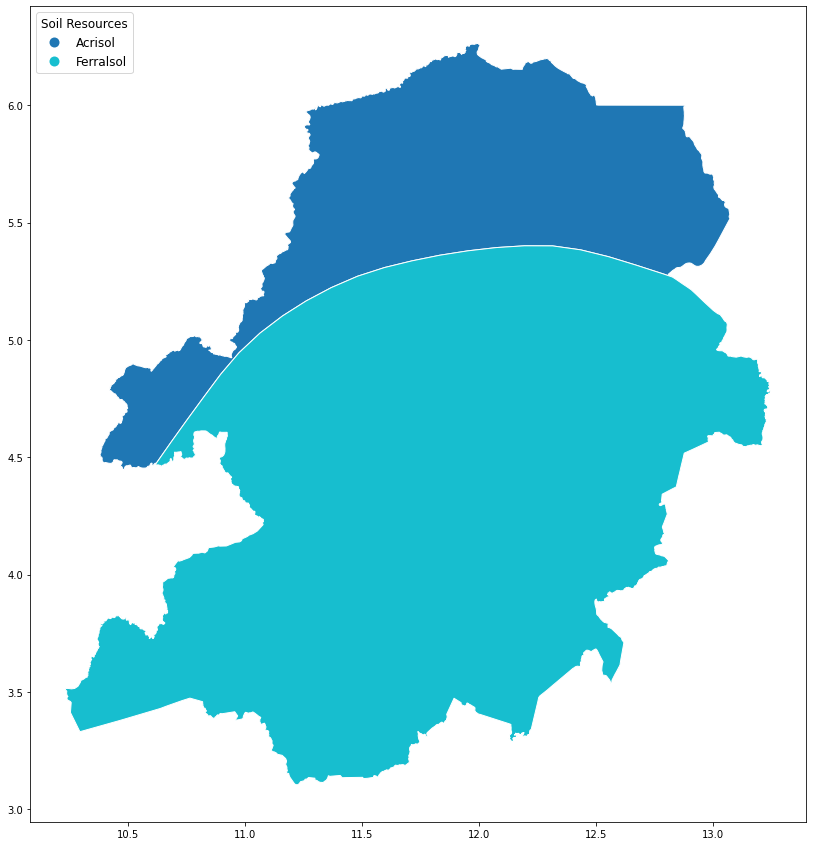

In [10]:
df_ccwsr.plot(figsize= (15,15), column='IPCC', edgecolor='white', 
             legend=True, legend_kwds={"loc":"upper left","fontsize": "large", "title":"Soil Resources", "title_fontsize":"large"})
plt.show()

# Agricultural Activities of Centre Cameroon 
The Centre is one of Cameroon's strongest economic zones due in great part to the presence of the capital city. In fact, the area is second only to the coastal regions of the Littoral, South, and Southwest Provinces. Many international organisations are headquartered at Yaoundé, among them the Bank of Central African States and the African Organisation of Industrial Property.

The Centre's soil is primarily composed of Precambrian deposits of metamorphic rocks, such as gneiss, mica, migmatites, and schists. Granite dominates from about 4˚ N and to the Adamawa border. Faults along the border with the South Province have deposited metamorphic schists and quartzites, with some granite. Laterites are also common, caused by the decomposition of the crystalline rock.

Red ferrallitic soil dominates most of the region, including the forested zone and much of the savanna area. Though as deep as ten metres, this soil is leached by silica and percolating water, making it only marginally productive for agriculture. However, it is usable as a building material, and traditional houses in the province are made from red, sun-dried bricks of mud. Toward the northern border, this soil becomes lightly evolved with large deposits of raw minerals, and at the confluence of the Sanaga and Mbam rivers, it is a mixture of several soil types.

Most farmers in the Centre are largely concerned with the raising of crops such as plantains (common south of Yaoundé) and cocoyams and yams (common west and northwest of the capital). Rice and yam cultivation are practiced along the banks of the Sanaga in the Upper Sanaga division. Groundnuts, maize and other cereals are common in the province's less humid north, and manioc grows throughout.

Sustenance farmers first clear small patches of forest. They remove trees with traditional tools such as axes or machetes during the dry season and burn the resulting brush. Farmers take care to protect trees bearing edible fruit, such as mangoes, plums, and pears, though fires sometimes grow out of control and prevent this. Farmers then plant seeds after the first rains: spices and vegetables closer to the house, plantains and tubers in larger plots farther into the bush. Villagers traditionally group their farms together as protection against animals and harvest their crops at the beginning of the dry season.

Plantation agriculture
This region is one of Cameroon's most important cash-crop zones due to its hot, humid climate and well-developed infrastructure. Cocoa is king, and it grows in all areas but the Mbam division. The largest plantations are those outside of Yaoundé and to a greater extent to the northwest between the Nyong and Sanaga Rivers. Other major cocoa centres include the Sanaga River valley near Nanga Eboko and the regions around the towns of Akonolinga, Obala, and Saa. Some of these plantations are owned by peasant populations of Bassa and Ewondo, and SODECAO (Cocoa Development Company) is a major owner.

The Centre is also home to Cameroon's only sugar-cane plantations, located at Mbandjock. SOSUCAM (Société Sucrerie du Cameroun) is the largest company in the region with 40 km². Peasant sugar plantations also operate in the area.

A variety of other crops make up the rest of the plantation economy. Rice cultivation occurs along the Sanaga River valley in fields owned by SARIOECOO. Coffee is another important crop, grown in the eastern forests. Tobacco plantations owned by the Cameroon Tobacco Company (CTC) lie north of the Sanaga River at Batchenga. Palm plantations for palm oil and kernels, are located in the lower Sanaga and Nyong valleys, in the Nyong and Kelle division. Most of these are owned by SOCAPALM, headquartered in Eséka. Pineapples are grown commercially at Mbandjock by the Cameroon Pineapple Company.

In [ ]:
# Downloading and displaying Centre Cameroon's Managed Forest Concessions
url4 = "https://datasets.mojaglobal.workers.dev/0:/LandCover/Forest/ManagedForestConcessions/ManagedForestConcessions_CMR.geojson"

a=requests.get(url4).content

df_ccmfc = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_ccmfc

In [ ]:
df_ccmfc1 = pd.merge(df_ccbo, df_ccmfc, how='outer', on = 'geometry')
df_ccmfc1

In [ ]:
df_ccmfc2 = df_ccmfc1.loc[df_ccmfc1['province'] == 'Centre'] 
df_ccmfc2 = pd.merge(df_ccbo, df_ccmfc2, how='outer', on = 'geometry')
df_ccmfc2

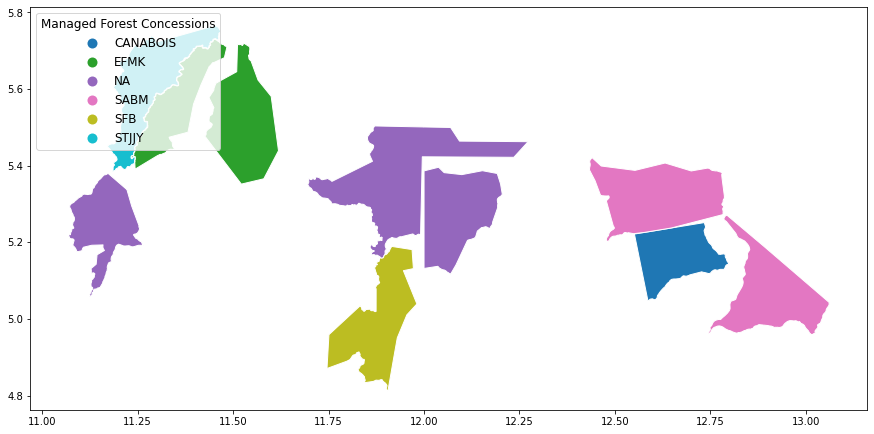

In [19]:
df_ccmfc2.plot(figsize= (15,15), column='company', edgecolor='white', 
             legend=True, legend_kwds={"loc":"upper left","fontsize": "large", "title":"Managed Forest Concessions", "title_fontsize":"large"})
plt.show()

In [20]:
#bins = list(df_ecgez["gez_code"].quantile([0, 0.03, 0.06, 0.11, 0.12]))
m = folium.Map(location=[4, 14], zoom_start=8)

folium.Choropleth(
    geo_data=df_ccmfc2,
    name = "chloropleth",
    data=df_ccmfc1,
    columns=["Shape_Area","Shape_Leng"],
    #key_on="feature.id",
    fill_color="Greens",
    fill_opacity=0.5,
    line_opacity=2.5,
    legend_name="CC MFC",
    #bins=bins,
    #reset=True,
).add_to(m)

m